In [1]:
%matplotlib inline
import openmc
from IPython.display import Image
from dagmc_geometry_slice_plotter import plot_axis_slice
import math

In [16]:
#materials

skin=openmc.Material(name='skin')
skin.add_element('H',10.0)
skin.add_element('C',19.9)
skin.add_element('N',4.2)
skin.add_element('O',65.0)
skin.add_element('Na',0.2)
skin.add_element('P',0.1)
skin.add_element('S',0.2)
skin.add_element('Cl',0.3)
skin.add_element('K',0.1)
skin.set_density('g/cm3', 1.089)
skin.id=5

skull=openmc.Material(name='skull')
skull.add_element('H',8.8)
skull.add_element('C',39.5)
skull.add_element('N',2.6)
skull.add_element('O',39.5)
skull.add_element('Na',0.1)
skull.add_element('Mg',0.1)
skull.add_element('P',2.8)
skull.add_element('S',0.2)
skull.add_element('Cl',0.1)
skull.add_element('K',0.1)
skull.add_element('Ca',6.2)
skull.set_density('g/cm3', 1.165)
skull.id=7

mandible=openmc.Material(name='mandible')
mandible.add_element('H',7.7)
mandible.add_element('C',33.2)
mandible.add_element('N',3.0)
mandible.add_element('O',42.0)
mandible.add_element('Na',0.2)
mandible.add_element('Mg',0.1)
mandible.add_element('P',4.1)
mandible.add_element('S',0.2)
mandible.add_element('Cl',0.1)
mandible.add_element('K',0.1)
mandible.add_element('Ca',9.3)
mandible.set_density('g/cm3',1.271)
mandible.id=8

somebones=openmc.Material(name='somebones')
somebones.add_element('H',9.6)
somebones.add_element('C',50.4)
somebones.add_element('N',1.7)
somebones.add_element('O',30.8)
somebones.add_element('Na',0.1)
somebones.add_element('P',2.2)
somebones.add_element('S',0.2)
somebones.add_element('Cl',0.1)
somebones.add_element('Ca',4.9)
somebones.set_density('g/cm3',1.109)
somebones.id=23

thoraicspine=openmc.Material(name='thoraicspine')
thoraicspine.add_element('H',10.0)
thoraicspine.add_element('C',40.3)
thoraicspine.add_element('N',2.8)
thoraicspine.add_element('O',43.1)
thoraicspine.add_element('Na',0.1)
thoraicspine.add_element('P',1.0)
thoraicspine.add_element('S',0.2)
thoraicspine.add_element('Cl',0.2)
thoraicspine.add_element('K',0.1)
thoraicspine.add_element('Ca',2.1)
thoraicspine.add_element('Fe',0.1)
thoraicspine.set_density('g/cm3',1.070)
thoraicspine.id=12

sacrum=openmc.Material(name='sacrum')
sacrum.add_element('H',10.5)
sacrum.add_element('C',42.6)
sacrum.add_element('N',2.7)
sacrum.add_element('O',42.6)
sacrum.add_element('Na',0.1)
sacrum.add_element('P',0.3)
sacrum.add_element('S',0.2)
sacrum.add_element('Cl',0.2)
sacrum.add_element('K',0.1)
sacrum.add_element('Ca',0.6)
sacrum.add_element('Fe',0.1)
sacrum.set_density('g/cm3',1.033)
sacrum.id=14

ribs=openmc.Material(name='ribs')
ribs.add_element('H',8.8)
ribs.add_element('C',34.6)
ribs.add_element('N',3.1)
ribs.add_element('O',44.4)
ribs.add_element('Na',0.1)
ribs.add_element('Mg',0.1)
ribs.add_element('P',2.6)
ribs.add_element('S',0.2)
ribs.add_element('Cl',0.1)
ribs.add_element('K',0.1)
ribs.add_element('Ca',5.8)
ribs.add_element('Fe',0.1)
ribs.set_density('g/cm3',1.170)
ribs.id=15

pelvis=openmc.Material(name='pelvis')
pelvis.add_element('H',9.4)
pelvis.add_element('C',40.9)
pelvis.add_element('N',2.6)
pelvis.add_element('O',40.0)
pelvis.add_element('Na',0.1)
pelvis.add_element('Mg',0.1)
pelvis.add_element('P',2.0)
pelvis.add_element('S',0.2)
pelvis.add_element('Cl',0.1)
pelvis.add_element('K',0.1)
pelvis.add_element('Ca',4.5)
pelvis.set_density('g/cm3',1.121)
pelvis.id=16

lumbarspine=openmc.Material(name='lumbarspine')
lumbarspine.add_element('H',9.5)
lumbarspine.add_element('C',38.0)
lumbarspine.add_element('N',3.0)
lumbarspine.add_element('O',43.6)
lumbarspine.add_element('Na',0.1)
lumbarspine.add_element('P',1.6)
lumbarspine.add_element('S',0.2)
lumbarspine.add_element('Cl',0.2)
lumbarspine.add_element('K',0.1)
lumbarspine.add_element('Ca',3.6)
lumbarspine.add_element('Fe',0.1)
lumbarspine.set_density('g/cm3',1.108)
lumbarspine.id=17

corticalbone=openmc.Material(name='corticalbone')
corticalbone.add_element('H',3.6)
corticalbone.add_element('C',15.9)
corticalbone.add_element('N',4.2)
corticalbone.add_element('O',44.8)
corticalbone.add_element('Na',0.3)
corticalbone.add_element('Mg',0.2)
corticalbone.add_element('P',9.4)
corticalbone.add_element('S',0.3)
corticalbone.add_element('Ca',21.3)
corticalbone.set_density('g/cm3',1.904)
corticalbone.id=18

clavicles=openmc.Material(name='clavicles')
clavicles.add_element('H',8.9)
clavicles.add_element('C',40.9)
clavicles.add_element('N',2.5)
clavicles.add_element('O',38.5)
clavicles.add_element('Na',0.1)
clavicles.add_element('P',2.7)
clavicles.add_element('S',0.2)
clavicles.add_element('Cl',0.1)
clavicles.add_element('K',0.1)
clavicles.add_element('Ca',6.0)
clavicles.set_density('g/cm3',1.157)
clavicles.id=20

cervicalspine=openmc.Material(name='cervicalspine')
cervicalspine.add_element('H',10.3)
cervicalspine.add_element('C',41.6)
cervicalspine.add_element('N',2.8)
cervicalspine.add_element('O',42.8)
cervicalspine.add_element('Na',0.1)
cervicalspine.add_element('P',0.6)
cervicalspine.add_element('S',0.2)
cervicalspine.add_element('Cl',0.2)
cervicalspine.add_element('K',0.1)
cervicalspine.add_element('Ca',1.2)
cervicalspine.add_element('Fe',0.1)
cervicalspine.set_density('g/cm3',1.049)
cervicalspine.id=21

cartilage=openmc.Material(name='cartilage')
cartilage.add_element('H',9.6)
cartilage.add_element('C',9.9)
cartilage.add_element('N',2.2)
cartilage.add_element('O',74.4)
cartilage.add_element('Na',0.5)
cartilage.add_element('P',2.2)
cartilage.add_element('S',0.9)
cartilage.add_element('Cl',0.3)
cartilage.set_density('g/cm3',1.099)
cartilage.id=24

scapulae=openmc.Material(name='scapulae')
scapulae.add_element('H',8.4)
scapulae.add_element('C',37.3)
scapulae.add_element('N',2.7)
scapulae.add_element('O',40.4)
scapulae.add_element('Na',0.1)
scapulae.add_element('Mg',0.1)
scapulae.add_element('P',3.3)
scapulae.add_element('S',0.2)
scapulae.add_element('Cl',0.1)
scapulae.add_element('K',0.1)
scapulae.add_element('Ca',7.3)
scapulae.set_density('g/cm3',1.201)
scapulae.id=25

sternum=openmc.Material(name='sternum')
sternum.add_element('H',10.4)
sternum.add_element('C',42.1)
sternum.add_element('N',2.8)
sternum.add_element('O',42.7)
sternum.add_element('P',0.5)
sternum.add_element('S',0.2)
sternum.add_element('Cl',0.2)
sternum.add_element('K',0.1)
sternum.add_element('Ca',0.9)
sternum.add_element('Fe',0.1)
sternum.set_density('g/cm3',1.041)
sternum.id=26

teeth=openmc.Material(name='teeth')
teeth.add_element('H',2.3)
teeth.add_element('C',9.5)
teeth.add_element('N',2.9)
teeth.add_element('O',42.6)
teeth.add_element('Mg',0.7)
teeth.add_element('P',13.5)
teeth.add_element('Ca',28.5)
teeth.set_density('g/cm3',2.688)
teeth.id=27

vitreous=openmc.Material(name='vitreous')
vitreous.add_element('H',11.2)
vitreous.add_element('C',0.4)
vitreous.add_element('N',0.1)
vitreous.add_element('O',88.3)
vitreous.set_density('g/cm3',1.031)
vitreous.id=28

bladder=openmc.Material(name='bladder')
bladder.add_element('H',10.5)
bladder.add_element('C',9.6)
bladder.add_element('N',2.6)
bladder.add_element('O',76.1)
bladder.add_element('Na',0.2)
bladder.add_element('P',0.2)
bladder.add_element('S',0.2)
bladder.add_element('Cl',0.3)
bladder.add_element('K',0.3)
bladder.set_density('g/cm3',1.040)
bladder.id=29

sometissue=openmc.Material(name='sometissue')
sometissue.add_element('H',10.5)
sometissue.add_element('C',25.1)
sometissue.add_element('N',2.7)
sometissue.add_element('O',60.7)
sometissue.add_element('Na',0.1)
sometissue.add_element('P',0.2)
sometissue.add_element('S',0.3)
sometissue.add_element('Cl',0.2)
sometissue.add_element('K',0.2)
sometissue.set_density('g/cm3',1.031)
sometissue.id=30

medullary=openmc.Material(name='medullary')
medullary.add_element('H',11.5)
medullary.add_element('C',63.6)
medullary.add_element('N',0.7)
medullary.add_element('O',23.9)
medullary.add_element('Na',0.1)
medullary.add_element('S',0.1)
medullary.add_element('Cl',0.1)
medullary.set_density('g/cm3',0.981)
medullary.id=31

colon=openmc.Material(name='colon')
colon.add_element('H',10.5)
colon.add_element('C',11.4)
colon.add_element('N',2.5)
colon.add_element('O',75.0)
colon.add_element('Na',0.1)
colon.add_element('P',0.1)
colon.add_element('S',0.1)
colon.add_element('Cl',0.2)
colon.add_element('K',0.1)
colon.set_density('g/cm3',1.037)
colon.id=32

tongue=openmc.Material(name='tongue')
tongue.add_element('H',10.2)
tongue.add_element('C',14.2)
tongue.add_element('N',3.4)
tongue.add_element('O',71.1)
tongue.add_element('Na',0.1)
tongue.add_element('P',0.2)
tongue.add_element('S',0.3)
tongue.add_element('Cl',0.1)
tongue.add_element('K',0.4)
tongue.set_density('g/cm3',1.050)
tongue.id=33

thyroid=openmc.Material(name='thyroid')
thyroid.add_element('H',10.4)
thyroid.add_element('C',11.8)
thyroid.add_element('N',2.5)
thyroid.add_element('O',74.5)
thyroid.add_element('Na',0.2)
thyroid.add_element('P',0.1)
thyroid.add_element('S',0.1)
thyroid.add_element('Cl',0.2)
thyroid.add_element('K',0.1)
thyroid.add_element('I',0.1)
thyroid.set_density('g/cm3',1.051)
thyroid.id=34

stomach=openmc.Material(name='stomach')
stomach.add_element('H',10.5)
stomach.add_element('C',11.4)
stomach.add_element('N',2.5)
stomach.add_element('O',75.0)
stomach.add_element('Na',0.1)
stomach.add_element('P',0.1)
stomach.add_element('S',0.1)
stomach.add_element('Cl',0.2)
stomach.add_element('K',0.1)
stomach.set_density('g/cm3',1.037)
stomach.id=35

spleen=openmc.Material(name='spleen')
spleen.add_element('H',10.3)
spleen.add_element('C',11.2)
spleen.add_element('N',3.2)
spleen.add_element('O',74.3)
spleen.add_element('Na',0.1)
spleen.add_element('P',0.2)
spleen.add_element('S',0.2)
spleen.add_element('Cl',0.2)
spleen.add_element('K',0.3)
spleen.set_density('g/cm3',1.060)
spleen.id=36

small_intestine=openmc.Material(name='small_intestine')
small_intestine.add_element('H',10.5)
small_intestine.add_element('C',11.4)
small_intestine.add_element('N',2.5)
small_intestine.add_element('O',75.0)
small_intestine.add_element('Na',0.1)
small_intestine.add_element('P',0.1)
small_intestine.add_element('S',0.1)
small_intestine.add_element('Cl',0.2)
small_intestine.add_element('K',0.1)
small_intestine.set_density('g/cm3',1.037)
small_intestine.id=37

pancreas=openmc.Material(name='pancreas')
pancreas.add_element('H',10.5)
pancreas.add_element('C',15.8)
pancreas.add_element('N',2.4)
pancreas.add_element('O',70.4)
pancreas.add_element('Na',0.2)
pancreas.add_element('P',0.2)
pancreas.add_element('S',0.1)
pancreas.add_element('Cl',0.2)
pancreas.add_element('K',0.2)
pancreas.add_element('Ca',0.2)
pancreas.set_density('g/cm3',1.044)
pancreas.id=38

lung=openmc.Material(name='lung')
lung.add_element('H',10.2)
lung.add_element('C',10.8)
lung.add_element('N',3.2)
lung.add_element('O',74.8)
lung.add_element('Na',0.1)
lung.add_element('P',0.1)
lung.add_element('S',0.2)
lung.add_element('Cl',0.3)
lung.add_element('K',0.2)
lung.add_element('Fe',0.1)
lung.set_density('g/cm3',0.415)
lung.id=39

liver=openmc.Material(name='liver')
liver.add_element('H',10.2)
liver.add_element('C',13.2)
liver.add_element('N',3.1)
liver.add_element('O',72.3)
liver.add_element('Na',0.2)
liver.add_element('P',0.2)
liver.add_element('S',0.3)
liver.add_element('Cl',0.2)
liver.add_element('K',0.3)
liver.set_density('g/cm3',1.060)
liver.id=40

kidney=openmc.Material(name='kidney')
kidney.add_element('H',10.3)
kidney.add_element('C',12.6)
kidney.add_element('N',3.1)
kidney.add_element('O',72.9)
kidney.add_element('Na',0.2)
kidney.add_element('P',0.2)
kidney.add_element('S',0.2)
kidney.add_element('Cl',0.2)
kidney.add_element('K',0.2)
kidney.add_element('Ca',0.1)
kidney.set_density('g/cm3',1.053)
kidney.id=41

humeri_upper=openmc.Material(name='humeri_upper')
humeri_upper.add_element('H',8.1)
humeri_upper.add_element('C',35.4)
humeri_upper.add_element('N',2.8)
humeri_upper.add_element('O',41.0)
humeri_upper.add_element('Na',0.2)
humeri_upper.add_element('Mg',0.1)
humeri_upper.add_element('P',3.7)
humeri_upper.add_element('S',0.2)
humeri_upper.add_element('Cl',0.1)
humeri_upper.add_element('K',0.1)
humeri_upper.add_element('Ca',8.3)
humeri_upper.set_density('g/cm3',1.233)
humeri_upper.id=42

heart=openmc.Material(name='heart')
heart.add_element('H',10.4)
heart.add_element('C',13.5)
heart.add_element('N',2.9)
heart.add_element('O',72.2)
heart.add_element('Na',0.1)
heart.add_element('P',0.2)
heart.add_element('S',0.2)
heart.add_element('Cl',0.2)
heart.add_element('K',0.3)
heart.set_density('g/cm3',1.051)
heart.id=43

femora_upper=openmc.Material(name='femora_upper')
femora_upper.add_element('H',9.3)
femora_upper.add_element('C',44.1)
femora_upper.add_element('N',2.3)
femora_upper.add_element('O',36.5)
femora_upper.add_element('Na',0.1)
femora_upper.add_element('Mg',0.1)
femora_upper.add_element('P',2.2)
femora_upper.add_element('S',0.2)
femora_upper.add_element('Cl',0.1)
femora_upper.add_element('K',0.1)
femora_upper.add_element('Ca',5.0)
femora_upper.set_density('g/cm3',1.125)
femora_upper.id=44

eye_lens=openmc.Material(name='eye_lens')
eye_lens.add_element('H',9.6)
eye_lens.add_element('C',19.5)
eye_lens.add_element('N',5.7)
eye_lens.add_element('O',64.6)
eye_lens.add_element('Na',0.1)
eye_lens.add_element('P',0.1)
eye_lens.add_element('S',0.3)
eye_lens.add_element('Cl',0.1)
eye_lens.set_density('g/cm3',1.060)
eye_lens.id=45

cornea=openmc.Material(name='cornea')
cornea.add_element('H',10.1)
cornea.add_element('C',12.5)
cornea.add_element('N',3.7)
cornea.add_element('O',73.2)
cornea.add_element('Na',0.1)
cornea.add_element('P',0.1)
cornea.add_element('S',0.2)
cornea.add_element('Cl',0.1)
cornea.set_density('g/cm3',1.100)
cornea.id=46

breast_glandular=openmc.Material(name='breast_glandular')
breast_glandular.add_element('H',10.6)
breast_glandular.add_element('C',32.4)
breast_glandular.add_element('N',3.0)
breast_glandular.add_element('O',53.5)
breast_glandular.add_element('Na',0.1)
breast_glandular.add_element('P',0.1)
breast_glandular.add_element('S',0.2)
breast_glandular.add_element('Cl',0.1)
breast_glandular.set_density('g/cm3',1.021)
breast_glandular.id=47

breast_adipose=openmc.Material(name='breast_adipose')
breast_adipose.add_element('H',11.4)
breast_adipose.add_element('C',58.1)
breast_adipose.add_element('N',0.8)
breast_adipose.add_element('O',29.4)
breast_adipose.add_element('Na',0.1)
breast_adipose.add_element('S',0.1)
breast_adipose.add_element('Cl',0.1)
breast_adipose.set_density('g/cm3',0.953)
breast_adipose.id=48

brain=openmc.Material(name='brain')
brain.add_element('H',10.7)
brain.add_element('C',14.3)
brain.add_element('N',2.3)
brain.add_element('O',71.3)
brain.add_element('Na',0.2)
brain.add_element('P',0.4)
brain.add_element('S',0.2)
brain.add_element('Cl',0.3)
brain.add_element('K',0.3)
brain.set_density('g/cm3',1.041)
brain.id=49

blood=openmc.Material(name='blood')
blood.add_element('H',10.2)
blood.add_element('C',11.0)
blood.add_element('N',3.3)
blood.add_element('O',74.5)
blood.add_element('Na',0.1)
blood.add_element('P',0.1)
blood.add_element('S',0.2)
blood.add_element('Cl',0.3)
blood.add_element('K',0.2)
blood.add_element('Fe',0.1)
blood.set_density('g/cm3',1.060)
blood.id=50

aqueous=openmc.Material(name='aqueous')
aqueous.add_element('H',11.2)
aqueous.add_element('C',0.4)
aqueous.add_element('N',0.1)
aqueous.add_element('O',88.3)
aqueous.set_density('g/cm3',1.025)
aqueous.id=51

adrenal=openmc.Material(name='adrenal')
adrenal.add_element('H',10.4)
adrenal.add_element('C',22.8)
adrenal.add_element('N',2.8)
adrenal.add_element('O',63.0)
adrenal.add_element('Na',0.1)
adrenal.add_element('P',0.2)
adrenal.add_element('S',0.3)
adrenal.add_element('Cl',0.2)
adrenal.add_element('K',0.2)
adrenal.set_density('g/cm3',1.036)
adrenal.id=52

urine=openmc.Material(name='urine')
urine.add_element('H',10.7)
urine.add_element('C',0.3)
urine.add_element('N',1.0)
urine.add_element('O',87.3)
urine.add_element('Na',0.4)
urine.add_element('P',0.1)
urine.add_element('K',0.2)
urine.set_density('g/cm3',1.040)
urine.id=53

GI_contents=openmc.Material(name='GI_contents')
GI_contents.add_element('H',10.0)
GI_contents.add_element('C',22.2)
GI_contents.add_element('N',2.2)
GI_contents.add_element('O',64.4)
GI_contents.add_element('Na',0.1)
GI_contents.add_element('P',0.2)
GI_contents.add_element('S',0.3)
GI_contents.add_element('Cl',0.1)
GI_contents.add_element('K',0.4)
GI_contents.add_element('Ca',0.1)
GI_contents.set_density('g/cm3',1.040)
GI_contents.id=54

air=openmc.Material(name='air')
air.add_element('N',80.0)
air.add_element('O',20.0)
air.set_density('g/cm3',0.001)
air.id=55

RST=openmc.Material(name='RST')
RST.add_element('H',11.2)
RST.add_element('C',51.7)
RST.add_element('N',1.1)
RST.add_element('O',35.5)
RST.add_element('Na',0.1)
RST.add_element('P',0.1)
RST.add_element('S',0.2)
RST.add_element('Cl',0.1)
RST.set_density('g/cm3',0.939)
RST.id=56

prostate=openmc.Material(name='prostate')
prostate.add_element('H',10.5)
prostate.add_element('C',25.1)
prostate.add_element('N',2.7)
prostate.add_element('O',60.7)
prostate.add_element('Na',0.1)
prostate.add_element('P',0.2)
prostate.add_element('S',0.3)
prostate.add_element('Cl',0.2)
prostate.add_element('K',0.2)
prostate.set_density('g/cm3',1.031)
prostate.id=57

oesophagus=openmc.Material(name='oesophagus')
oesophagus.add_element('H',10.4)
oesophagus.add_element('C',22.3)
oesophagus.add_element('N',2.8)
oesophagus.add_element('O',63.5)
oesophagus.add_element('Na',0.1)
oesophagus.add_element('P',0.2)
oesophagus.add_element('S',0.3)
oesophagus.add_element('Cl',0.2)
oesophagus.add_element('K',0.2)
oesophagus.set_density('g/cm3',1.037)
oesophagus.id=58

muscle=openmc.Material(name='muscle')
muscle.add_element('H',10.2)
muscle.add_element('C',14.2)
muscle.add_element('N',3.4)
muscle.add_element('O',71.1)
muscle.add_element('Na',0.1)
muscle.add_element('P',0.2)
muscle.add_element('S',0.3)
muscle.add_element('Cl',0.1)
muscle.add_element('K',0.4)
muscle.set_density('g/cm3',1.050)
muscle.id=59

lymphatic_nodes=openmc.Material(name='lymphatic_nodes')
lymphatic_nodes.add_element('H',10.8)
lymphatic_nodes.add_element('C',4.5)
lymphatic_nodes.add_element('N',1.2)
lymphatic_nodes.add_element('O',82.7)
lymphatic_nodes.add_element('Na',0.3)
lymphatic_nodes.add_element('S',0.1)
lymphatic_nodes.add_element('Cl',0.4)
lymphatic_nodes.set_density('g/cm3',1.032)
lymphatic_nodes.id=60

gall_bladder_contents=openmc.Material(name='gall_bladder_contents')
gall_bladder_contents.add_element('H',10.5)
gall_bladder_contents.add_element('C',25.6)
gall_bladder_contents.add_element('N',2.7)
gall_bladder_contents.add_element('O',60.2)
gall_bladder_contents.add_element('Na',0.1)
gall_bladder_contents.add_element('P',0.2)
gall_bladder_contents.add_element('S',0.3)
gall_bladder_contents.add_element('Cl',0.2)
gall_bladder_contents.add_element('K',0.2)
gall_bladder_contents.set_density('g/cm3',1.030)
gall_bladder_contents.id=61

gonads=openmc.Material(name='gonads')
gonads.add_element('H',10.6)
gonads.add_element('C',9.9)
gonads.add_element('N',2.1)
gonads.add_element('O',76.5)
gonads.add_element('Na',0.2)
gonads.add_element('P',0.1)
gonads.add_element('S',0.2)
gonads.add_element('Cl',0.2)
gonads.add_element('K',0.2)
gonads.set_density('g/cm3',1.041)
gonads.id=62

materials=openmc.Materials([skin, skull, mandible, somebones, thoraicspine, sacrum, ribs, pelvis, lumbarspine, corticalbone, 
                            clavicles, cervicalspine, cartilage, scapulae, sternum, teeth, vitreous, bladder, sometissue, 
                            medullary, colon, tongue, thyroid, stomach, spleen, small_intestine, pancreas, lung, liver, kidney,
                            humeri_upper, heart, femora_upper, eye_lens, cornea, breast_glandular, breast_adipose, brain, blood, 
                            aqueous, adrenal, urine, GI_contents, air, RST, prostate, muscle, oesophagus, lymphatic_nodes, 
                            gall_bladder_contents, gonads])

#isinstance(materials, list)

materials.export_to_xml()
#!cat materials.xml

In [3]:
#geometry
dagmc_univ=openmc.DAGMCUniverse(filename='whole_body.h5m').bounded_universe()
geometry=openmc.Geometry(root=dagmc_univ)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell fill="1" id="10000" region="10000 -10001 10002 -10003 10004 -10005" universe="2" />
  <dagmc_universe filename="whole_body.h5m" id="1" />
  <surface boundary="vacuum" coeffs="-30.130608898669863" id="10000" type="x-plane" />
  <surface boundary="vacuum" coeffs="28.428767057252717" id="10001" type="x-plane" />
  <surface boundary="vacuum" coeffs="-14.282949390078358" id="10002" type="y-plane" />
  <surface boundary="vacuum" coeffs="16.299369984695808" id="10003" type="y-plane" />
  <surface boundary="vacuum" coeffs="-92.25326043005684" id="10004" type="z-plane" />
  <surface boundary="vacuum" coeffs="92.55178053104382" id="10005" type="z-plane" />
</geometry>


In [20]:
# Due to the complicated geometry the lower spine, wrist and hand bone spongiosa (bone filling), blood in large arteries and 
# muscle volumes didnt mesh.

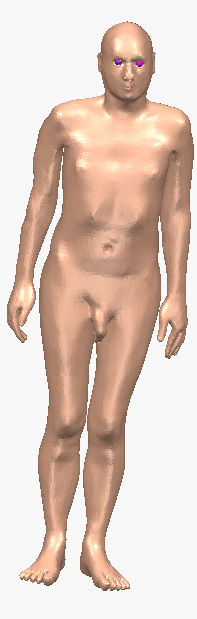

In [4]:
#Male phantom used
Image("with_skin.PNG")

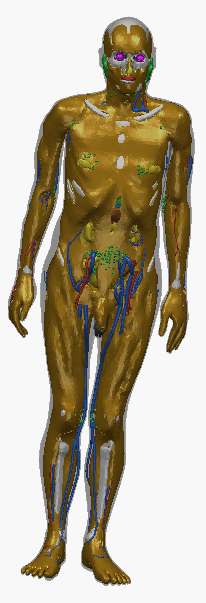

In [5]:
#What the phantom looks like without the skin layers
Image("without_skin.PNG")

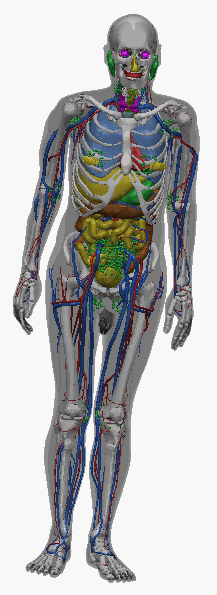

In [7]:
#What the phantom looks like when the skin and muscle layers are removed
Image("without_muscles.PNG")

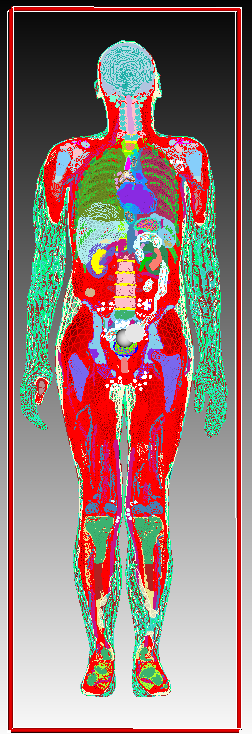

In [8]:
#Meshed phantom front view
Image("cubit_whole_front.png")

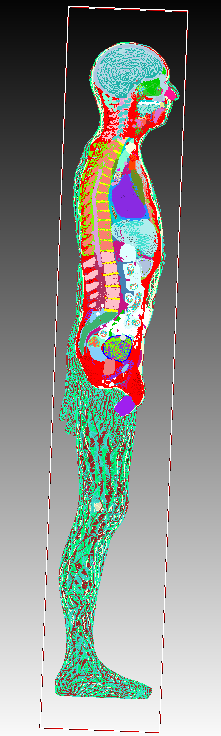

In [9]:
#Meshed phantom side view
Image("cubit_whole_side.png")

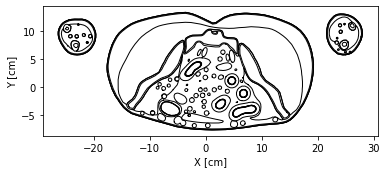

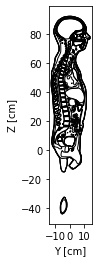

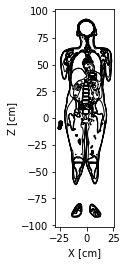

In [10]:
#plotting
plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='whole_body.h5m',
    view_direction='z',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='whole_body.h5m',
    view_direction='x',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='whole_body.h5m',
    view_direction='y',
)

plot.show()

In [11]:
#point source
point=openmc.stats.Point((0,0,80)) #the source is currently somewhere in the brain 
source=openmc.Source(space=point)

source.energy = openmc.stats.Discrete([1e6], [1])
source.particle = 'photon'

In [12]:
#settings
settings=openmc.Settings()
settings.source=source
settings.batches=500
settings.inactive=100
settings.particles=5000 

settings.run_mode = "fixed source"

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>fixed source</run_mode>
  <particles>5000</particles>
  <batches>500</batches>
  <inactive>100</inactive>
  <source particle="photon" strength="1.0">
    <space type="point">
      <parameters>0 0 80</parameters>
    </space>
    <energy type="discrete">
      <parameters>1000000.0 1.0</parameters>
    </energy>
  </source>
</settings>


In [13]:
#tallies
energy_bins_p, dose_coeffs_p = openmc.data.dose_coefficients(particle='photon', geometry='AP')

energy_function_filter_p = openmc.EnergyFunctionFilter(energy_bins_p, dose_coeffs_p)
energy_function_filter_p.interpolation == 'cubic'

photon_particle_filter = openmc.ParticleFilter(["photon"])
surface_filter=openmc.SurfaceFilter(39) #check the surface ID in cubit

dose_tally = openmc.Tally(name="dose_tally_on_surface")
dose_tally.scores = ["current"]
dose_tally.filters = [
    surface_filter,
    photon_particle_filter,
    energy_function_filter_p,
]
my_tallies = openmc.Tallies([dose_tally])
my_tallies.export_to_xml()

In [17]:
#running the model
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [18]:
#post-processing
sp=openmc.StatePoint('statepoint.500.h5')

tally=sp.get_tally(name='dose_tally_on_surface')
df=tally.get_pandas_dataframe()
print(df)

tally_result=df['mean'].sum()
tally_std_dev=df['std. dev.'].sum()

dose_in_pSv=tally_result/(82318.6)#get surface area from cubit

source_activity=5000
emission_rate=2 #from example, might not be correct
gamma_per_second=source_activity*emission_rate
dose_rate_in_pSv=dose_in_pSv*gamma_per_second
 
print('The surface dose = ', dose_rate_in_pSv, 'pSv per sec') #??

   surface particle  energyfunction nuclide    score     mean  std. dev.
0       39   photon  00d8cd707d2217   total  current 3.02e-01   9.23e-04
The surface dose =  0.036715540081897396 pSv per sec


In [21]:
# The surface dose is measured from the outer skin layer